<a href="https://colab.research.google.com/github/SaMoAAlamdari/Price-Optimizing/blob/main/Price_Optimizing_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from google.colab import files
import io
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# Upload and read the data
uploaded = files.upload()
pricing_data = pd.read_csv(io.BytesIO(uploaded["retail_sales_dataset.csv"]))


Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [4]:
# Display the first few rows
print(pricing_data.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [5]:
# Display data info
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


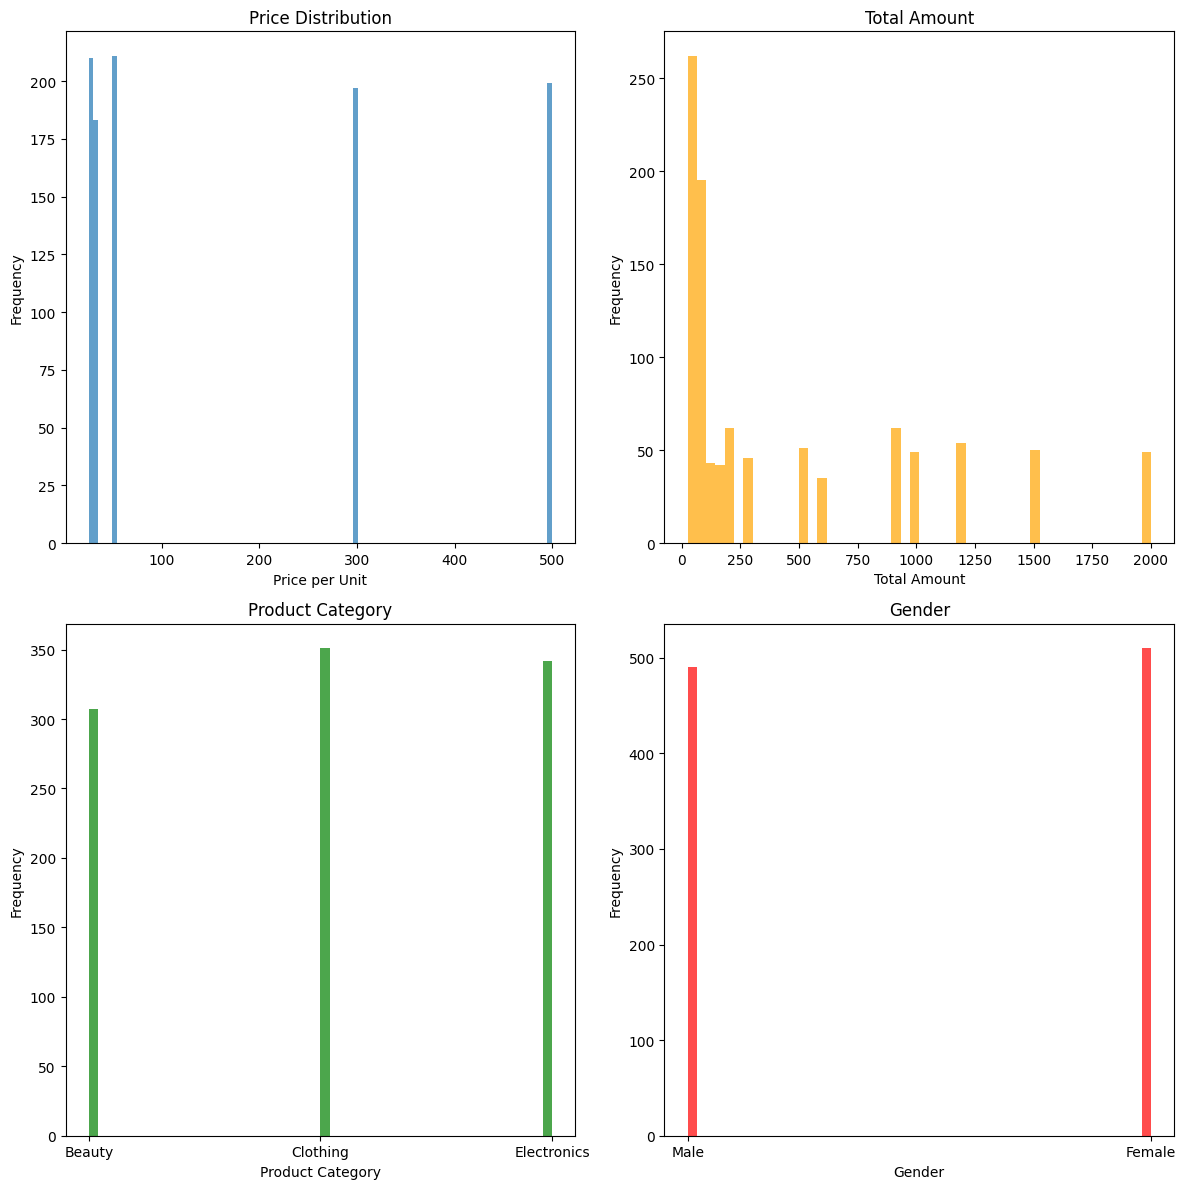

In [6]:
# Plot the frequency distributions
def plot_histograms(data):
    plt.figure(figsize=(12, 12))

    plt.subplot(2, 2, 1)
    plt.hist(data['Price per Unit'], bins=100, alpha=0.7)
    plt.xlabel('Price per Unit')
    plt.ylabel('Frequency')
    plt.title('Price Distribution')

    plt.subplot(2, 2, 2)
    plt.hist(data['Total Amount'], bins=50, alpha=0.7, color='orange')
    plt.xlabel('Total Amount')
    plt.ylabel('Frequency')
    plt.title('Total Amount')

    plt.subplot(2, 2, 3)
    plt.hist(data['Product Category'], bins=50, alpha=0.7, color='green')
    plt.xlabel('Product Category')
    plt.ylabel('Frequency')
    plt.title('Product Category')

    plt.subplot(2, 2, 4)
    plt.hist(data['Gender'], bins=50, alpha=0.7, color='red')
    plt.xlabel('Gender')
    plt.ylabel('Frequency')
    plt.title('Gender')

    plt.tight_layout()
    plt.show()

plot_histograms(pricing_data)

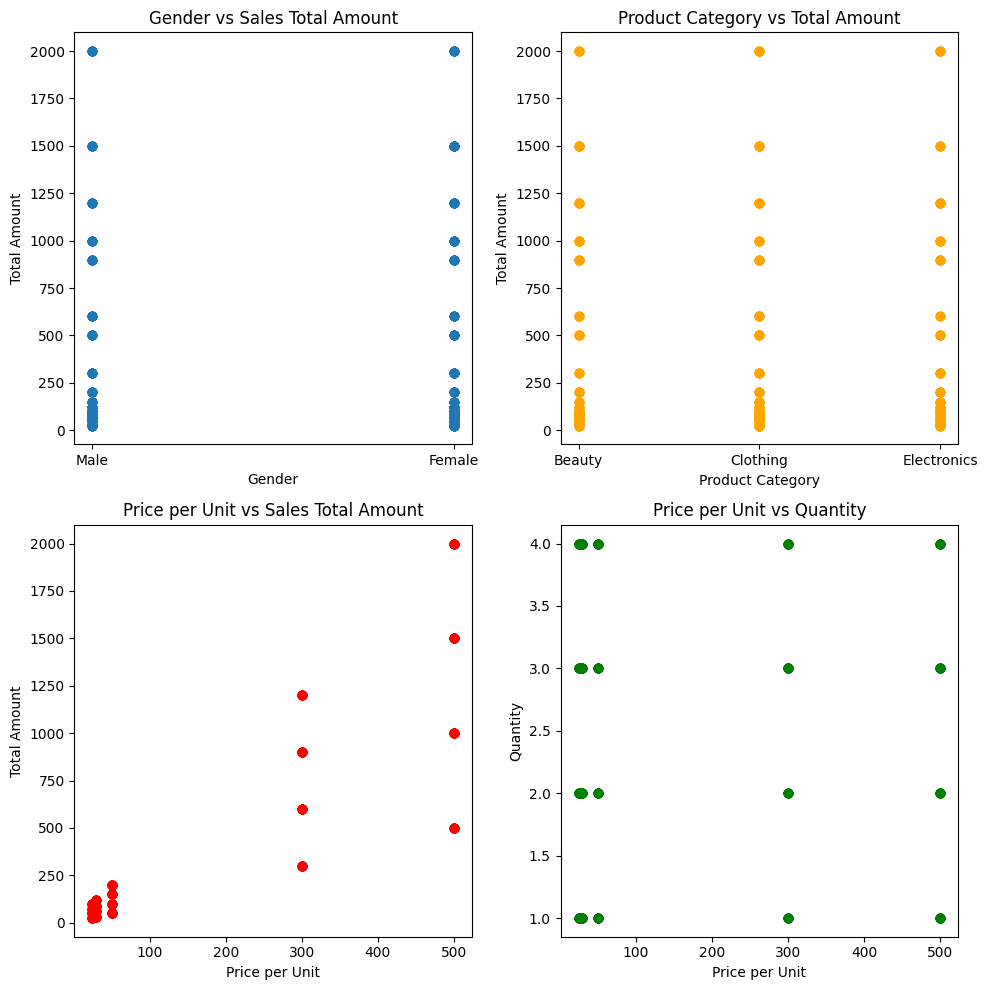

In [7]:
# Scatter plots to understand data better
def plot_scatter(data):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.scatter(data['Gender'], data['Total Amount'], alpha=0.6)
    plt.xlabel('Gender')
    plt.ylabel('Total Amount')
    plt.title('Gender vs Sales Total Amount')

    plt.subplot(2, 2, 2)
    plt.scatter(data['Product Category'], data['Total Amount'], alpha=0.6, color='orange')
    plt.xlabel('Product Category')
    plt.ylabel('Total Amount')
    plt.title('Product Category vs Total Amount')

    plt.subplot(2, 2, 3)
    plt.scatter(data['Price per Unit'], data['Total Amount'], alpha=0.6, color='red')
    plt.xlabel('Price per Unit')
    plt.ylabel('Total Amount')
    plt.title('Price per Unit vs Sales Total Amount')

    plt.subplot(2, 2, 4)
    plt.scatter(data['Price per Unit'], data['Quantity'], alpha=0.6, color='green')
    plt.xlabel('Price per Unit')
    plt.ylabel('Quantity')
    plt.title('Price per Unit vs Quantity')

    plt.tight_layout()
    plt.show()

plot_scatter(pricing_data)

In [8]:
# Convert 'Date' column to datetime
pricing_data['Date'] = pd.to_datetime(pricing_data['Date'], format='%Y-%m-%d')

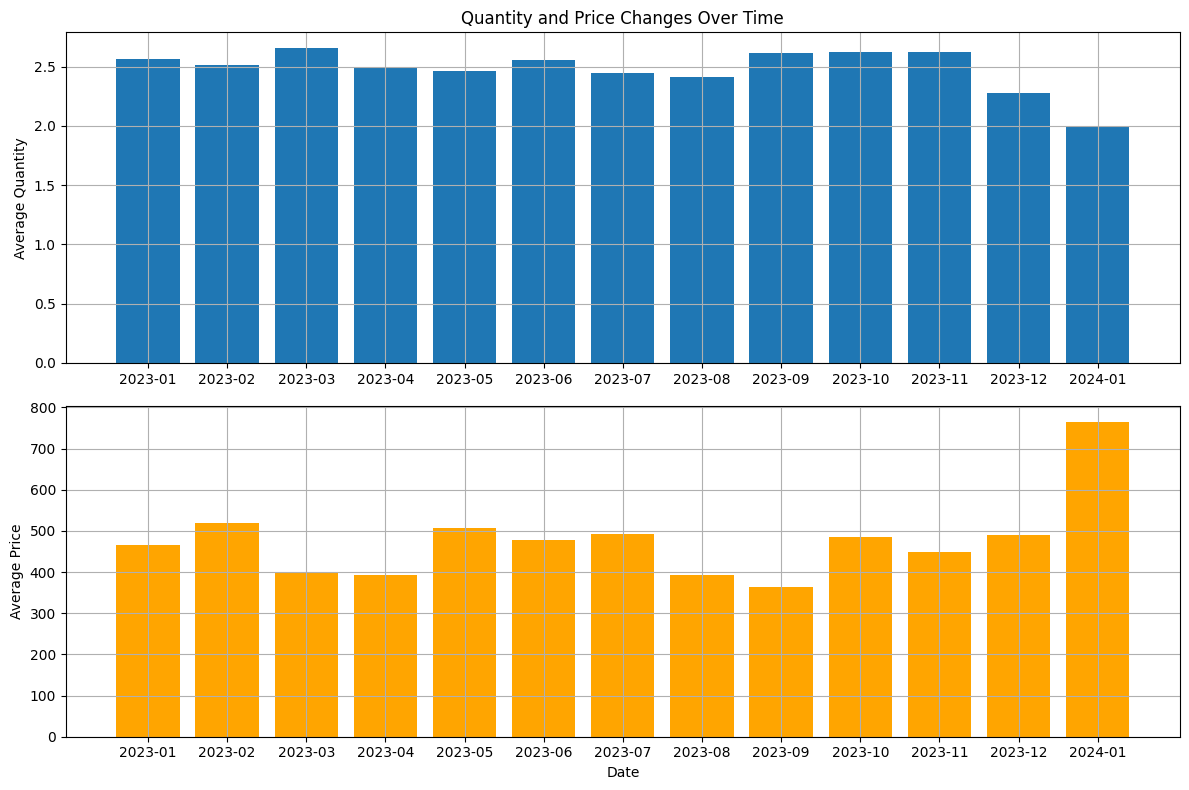

In [9]:
# Calculate weekly averages
weekly_prices = pricing_data.groupby(pricing_data['Date'].dt.strftime('%Y-%m')).agg({
    'Quantity': 'mean',
    'Total Amount': 'mean'
}).reset_index()

def plot_weekly_averages(data):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 1, 1)
    plt.bar(data['Date'], data['Quantity'], label='Quantity')
    plt.ylabel('Average Quantity')
    plt.title('Quantity and Price Changes Over Time')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.bar(data['Date'], data['Total Amount'], label='Total Amount', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_weekly_averages(weekly_prices)

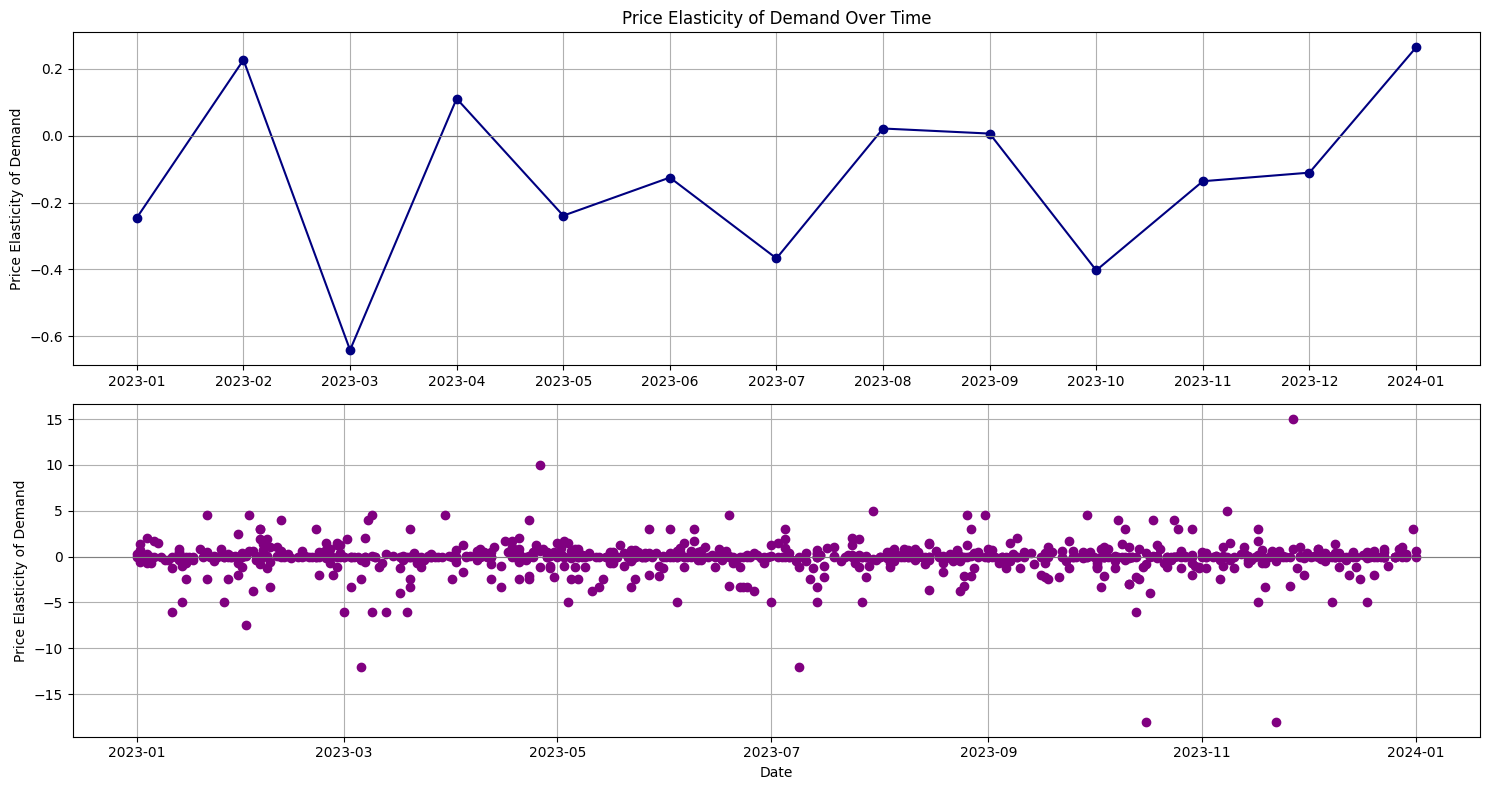

In [10]:

# Calculate price elasticity and plot
pricing_data['price_change'] = pricing_data['Price per Unit'].pct_change()
pricing_data['qty_change'] = pricing_data['Quantity'].pct_change()
pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']
pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

weekly_elasticity = pricing_data.groupby(pricing_data['Date'].dt.strftime('%Y-%m')).agg({
    'elasticity': 'mean'
}).reset_index()

def plot_elasticity(data):
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(data['Date'], data['elasticity'], marker='o', linestyle='-', color='navy')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.ylabel('Price Elasticity of Demand')
    plt.title('Price Elasticity of Demand Over Time')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(pricing_data['Date'], pricing_data['elasticity'], marker='o', linestyle=' ', color='purple')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.xlabel('Date')
    plt.ylabel('Price Elasticity of Demand')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_elasticity(weekly_elasticity)

In [11]:
# Define price brackets
bins = [0, 29, 49, 200, 400, 600]
labels = ['0-29', '29-49', '49-200', '200-400', '400-600']
pricing_data['price_bracket'] = pd.cut(pricing_data['Price per Unit'], bins=bins, labels=labels, right=False)

In [12]:
# Calculate sales and quantity by price bracket
sales_by_bracket = pricing_data.groupby('price_bracket', observed=False)['Total Amount'].sum().reset_index()
sales_by_bracket.columns = ['Price Bracket', 'Sales Amount']

quantity_by_bracket = pricing_data.groupby('price_bracket', observed=False)['Quantity'].sum().reset_index()
quantity_by_bracket.columns = ['Price Bracket', 'Quantity']

In [13]:
# Merge sales and quantity data
your_store = pd.merge(sales_by_bracket, quantity_by_bracket, on='Price Bracket')
your_store

,Price Bracket,Sales Amount,Quantity
0,0-29,9650,386
1,29-49,11580,386
2,49-200,20850,417
3,200-400,125100,417
4,400-600,206000,412


In [14]:
# Item summary and merging back
item_summary = pricing_data.groupby('price_bracket', observed=False).agg({
    'Price per Unit': 'mean',
    'Quantity': 'sum'
}).reset_index()

pricing_data = pd.merge(pricing_data, item_summary, on='price_bracket', suffixes=('', '_avg'))

In [15]:

# Define segments
pricing_data['segment'] = pd.cut(pricing_data['Price per Unit_avg'], bins=[0, 29, 49, 200, 400, 600], labels=['Low_25', 'Low_30', 'Low_50', 'Medium_300', 'High_500'])


In [16]:

# Calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['qty_change'] = segment_data['Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    segment_data.dropna(subset=['elasticity'], inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)
elasticity_df


,segment,avg_elasticity
0,High_500,0.123363
1,Low_30,-0.174159
2,Low_50,0.042899
3,Low_25,-0.498116
4,Medium_300,-0.150952


Low_30=-0.174159 and Low_25=-0.498116 and Medium_300 =-0.150952  that means quantity demands is relatively inelastic to price changes that means small changes in price will not significantly affect demand and we increasing price to maximaize revenue without losing much in sales volume
High_500=0.123363 and Low_50=0.042899 this indicate that the quantity demanded is more elastic to price changes this means demadnd is sensitive to price changes

In [17]:
# Apply dynamic pricing rules
dynamic_pricing_data = pricing_data.copy()
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low_25', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low_30', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Low_50', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 0.95
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium_300', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 1.1
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High_500', 'dynamic_price'] = dynamic_pricing_data['Price per Unit'] * 0.95


In [18]:
# Calculate new sales amounts
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Quantity']

In [19]:
# Compare total sales and quantities
total_sales_existing = pricing_data['Total Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

total_qty_existing = pricing_data['Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Quantity'].sum()  # quantity sold remains the same for comparison


In [20]:
comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,373180,375409.0
1,Total Quantity Sold,2018,2018.0
